# **DATA 311 UBCO, Ridge Regression implemented in Python**

## **Assignment 4, Advanced ML models:**

### **Ridge Implementation:**

In [1]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import log_loss
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import plot_tree
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

df = pd.read_csv('Hitters.csv')
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


In [2]:
df = df.dropna()

### **Lets use a 50 50 split on this one:**

In [3]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.5*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

### **Now let's regress:**

In [4]:
y_train = training_data['Salary']
x_train = pd.get_dummies(training_data.drop('Salary', axis=1))

ridge_mod = ElasticNet(alpha=1, l1_ratio=0).fit(x_train, y_train)

C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.150e+06, tolerance: 2.903e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### **Coefficeint:**

In [45]:
coefficients = dict(zip(training_data.columns, ridge_mod.coef_))
coefficients_df = pd.DataFrame(list(coefficients.items()), columns=['Feature', 'Coefficient'])
coefficients_df # df to make presentable in notebook

,Feature,Coefficient
0,AtBat,-0.226436
1,Hits,1.012370
2,HmRun,-0.016043
3,Runs,0.445416
4,RBI,0.396913
5,Walks,0.704745
6,Years,-0.036414
7,CAtBat,-0.451969
8,CHits,1.523891
9,CHmRun,-0.139612


### **And Plot:**

C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.920e+06, tolerance: 2.903e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality

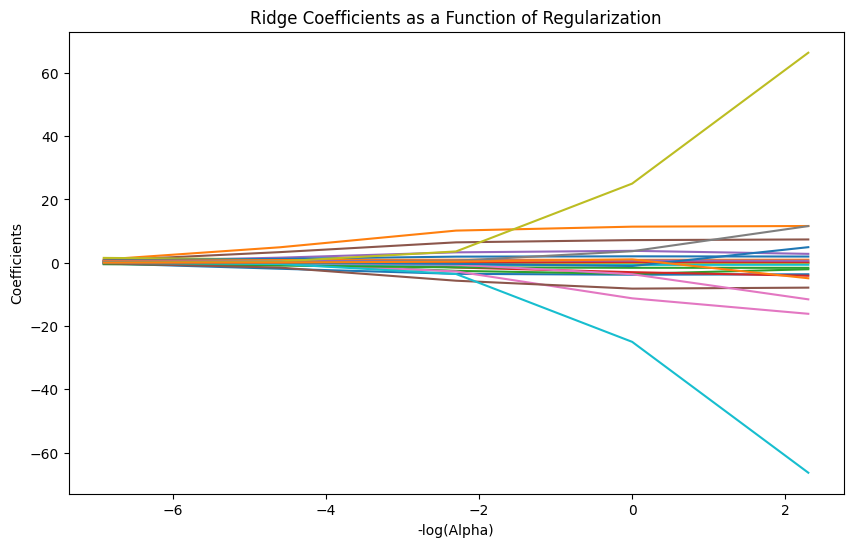

In [5]:
alphas = [0.1, 1, 10, 100, 1000]  # Example values for the regularization strength
coefs = []

for a in alphas:
    ridge_mod = ElasticNet(alpha=a, l1_ratio=0).fit(x_train, y_train)
    coefs.append(ridge_mod.coef_)

plt.figure(figsize=(10, 6));    plt.plot(-np.log(alphas), coefs)
plt.xlabel('-log(Alpha)');      plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Regularization');    plt.show()


C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3006599.753318287, tolerance: 2731.3166975863996
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5770184.344633431, tolerance: 2731.3166975863996
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWar

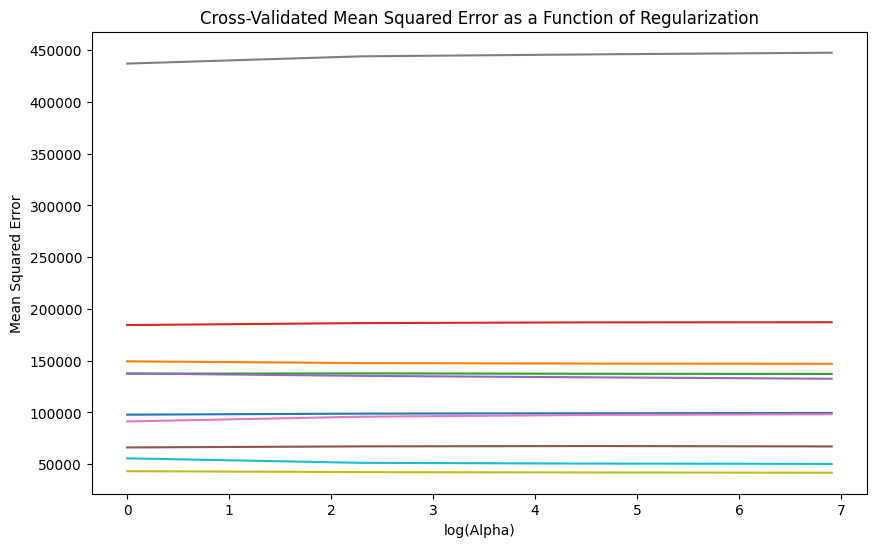

In [32]:
cv_out = ElasticNetCV(cv=10, alphas=[0.01, 0.1, 1, 10, 100, 1000], l1_ratio=[0.1, 0.4, 0.7, 1.0, 1.3, 1.6]).fit(x_train, y_train)
# # cv_out = ElasticNetCV(cv=10, alphas=[0.1, 1, 10, 100, 1000, 10000], l1_ratio=[0.1, 0.5, 0.7, 0.9]).fit(x_train, y_train)    # cv_out = ElasticNetCV(cv=10, alphas=np.logspace(-3, 7, 100), l1_ratio=[0.1, 0.5, 0.7, 0.9]).fit(x_train, y_train)

plt.figure(figsize=(10, 6));    plt.plot(np.log(cv_out.alphas_), cv_out.mse_path_.mean(axis=1))
plt.xlabel('log(Alpha)');   plt.ylabel('Mean Squared Error'); #plt.xlim(0, 15)
plt.title('Cross-Validated Mean Squared Error as a Function of Regularization');    plt.show()

### **Before we wrap up lets take a peek at the predictions:**

In [51]:
y_test = testing_data['Salary']
x_test = pd.get_dummies(testing_data.drop('Salary', axis=1))

predicted_salary = ridge_mod.predict(x_test)

testing_data.columns


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [52]:
outDF = pd.DataFrame(testing_data)

outDF['Predicted Salary'] = predicted_salary;           outDF['Actual Salary'] = outDF['Salary']

outDF['Predicted Salary'] = outDF['Predicted Salary'].astype('int');               outDF['Actual Salary'] = outDF['Actual Salary'].astype('int')


outDF = outDF[['Predicted Salary', 'Actual Salary'] + ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague']]

outDF.head(15)

,Predicted Salary,Actual Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,...,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
202,622,575,625,179,4,94,60,65,5,1696,...,12,216,163,166,A,E,303,450,14,A
216,310,137,258,60,8,28,33,18,3,638,...,17,80,75,36,A,W,358,32,8,A
166,661,640,591,157,16,90,78,26,4,2020,...,52,310,226,91,N,E,290,440,25,N
108,666,1175,641,198,31,101,108,41,5,2129,...,92,297,319,117,A,E,269,17,10,A
148,688,850,497,136,7,58,38,26,11,3871,...,40,450,367,241,A,E,304,347,10,A
317,687,700,497,127,7,65,48,37,5,2703,...,32,379,311,138,N,E,325,9,3,N
62,253,230,236,56,0,27,15,11,4,1115,...,1,116,64,57,A,W,125,199,13,A
231,552,750,526,163,12,88,50,77,4,1556,...,38,245,167,174,A,W,250,11,1,A
256,416,400,205,52,8,31,27,17,12,5134,...,56,643,445,459,A,E,155,3,2,A
274,620,200,522,140,16,73,77,60,4,730,...,22,93,106,86,N,E,1320,166,17,N


### **And then MSE:**

In [53]:
print("MSE:")
mme  =  (y_test - predicted_salary).mean()
mmse = ((y_test - predicted_salary) ** 2).mean()
print("Average Error: ", mme, "\t Mean Squared Error: ", mmse)

MSE:
Average Error:  1.8838264040434733 	 Mean Squared Error:  112927.75875291524


### **Final 2 Notebooks: Lasso Regression & Neural Networks**